# Principle Component Analysis

### PCA Algorithm
Be able to explain this for the exam:
Some data is often redundant due to the correlations between variables. So, we want to reduce this redundancy. We essentially want to reduce our data from high dimensionality to low dimensionality. We might also want to extract features for a machine learning algorithm, or be able to visualize the data more reliably.

**1 Standardize the data**
Calculate the mean of each variable and subtract this mean from all the data records in the associated variable. Should probably also divide by the standard deviation.

**2 Calculate the covariance matrix**
Measure the relationships between pairs of variables, determine the variance and covariance between variables.

**3 Calculate the eigenvalues and eigenvectors of the covariance matrix**
Eigenvectors represent the direction of maximum variance (what linear combination of original covariance variables gives max variance) in the data while eigenvalues represent the amount of variance explained by each eigenvector.

**4 Sort the eigenvalues from the largest to the smallest**
The eigenvector that corresponds to the highest eigenvalue is determined as the first principal component of the dataset.

**5 Reduce the dimensionality**
The Principal Components with less significance are ignored.

**6 Transform and reconstruct the dataset**
The transformed data can be reconstructed into the original feature space.


In [3]:
data = [
    {"X1": 2.5, "X2": 2.4},
    {"X1": 0.5, "X2": 0.7},
    {"X1": 2.2, "X2": 2.9},
    {"X1": 1.9, "X2": 2.2},
    {"X1": 3.1, "X2": 3},
    {"X1": 2.3, "X2": 2.7},
    {"X1": 2, "X2": 1.6},
    {"X1": 1, "X2": 1.1},
    {"X1": 1.5, "X2": 1.6},
    {"X1": 1.1, "X2": 0.9},
]

import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(data)
print(df)

    X1   X2
0  2.5  2.4
1  0.5  0.7
2  2.2  2.9
3  1.9  2.2
4  3.1  3.0
5  2.3  2.7
6  2.0  1.6
7  1.0  1.1
8  1.5  1.6
9  1.1  0.9


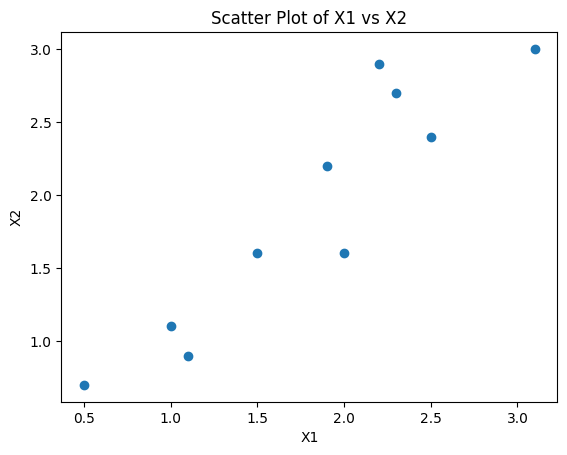

In [7]:
# Plot the data
plt.scatter(df['X1'], df['X2'])
plt.title('Scatter Plot of X1 vs X2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

The scatter plot seems to suggest that the diagonal would be a better primary axis as it captures the most important variance of the data records. Since not all the data records are on the diagonal but instead scattered around it, we can expect that the second highest variability of these data records will be orthogonal to the diagonal axis. We can say that the first principal component is expected to be the diagonal and the second principal component is expected to be the axis orthogonal to the diagonal.

We could reduce the variables by using only the new diagonal axis and throwing away the axis orthogonal to it.

### Step 1: Standardize the data

In [10]:
mean_X1 = df['X1'].mean()
mean_X2 = df['X2'].mean()
std_X1 = df['X1'].std()
std_X2 = df['X2'].std()
print(std_X1)

df['X1_std'] = (df['X1'] - mean_X1) / std_X1
df['X2_std'] = (df['X2'] - mean_X2) / std_X2

print(df)

0.7852105167122736
    X1   X2    X1_std    X2_std
0  2.5  2.4  0.878745  0.578857
1  0.5  0.7 -1.668342 -1.429422
2  2.2  2.9  0.496682  1.169527
3  1.9  2.2  0.114619  0.342589
4  3.1  3.0  1.642872  1.287661
5  2.3  2.7  0.624036  0.933259
6  2.0  1.6  0.241973 -0.366216
7  1.0  1.1 -1.031570 -0.956886
8  1.5  1.6 -0.394799 -0.366216
9  1.1  0.9 -0.904216 -1.193154


### Step 2: Calculate the Covariance Matrix
The equation to calculate the covariance is given as follows:

$$c_{ij} = \frac{1}{N-1}\sum_{k = 1}^{N}(x_{i} - \bar{x_{i}})_{k}(x_{j} - \bar{x_{j}})_{k}$$

So, for example

$$c_{11} = \frac{1}{N-1}\sum_{k = 1}^{N}(x_{1} - \bar{x_{1}})_{k}^{2}$$

and

$$c_{12} = \frac{1}{N-1}\sum_{k = 1}^{N}(x_{1} - \bar{x_{1}})_{k}(x_{2} - \bar{x_{2}})_{k}$$

We can calculate this in python as follows:

In [12]:
cov_matrix = df[['X1', 'X2']].cov()
print(cov_matrix)

          X1        X2
X1  0.616556  0.615444
X2  0.615444  0.716556


### Step 3: Calculate the eigenvalues and eigenvectors
Let the covariance matrix be called $C$. We want to transform this matrix so that it is a matrix in its own eigenspace. In other words, we want to find the eigenvalues and eigenvectors of this matrix in order to represent the covariance in an eigenspace, giving us orthogonal components that only vary along their components, allowing for dimensionality reduction. Any matrix that has the following property:

$$ C\vec{x} = \lambda \vec{x} $$

essentially transforms the vector $\vec{x}$ along its own component; i.e., the transformation simply scales the vector. We therefore need to solve this equation to find the vectors $\vec{x}$ such that

$$ (C - \lambda \cdot I) \vec{x} = \vec{0} $$

where $\vec{x}$ is not just the trivial solution \vec{x} = \vec{0}. This is only satisfied if the matrix $(C - \lambda \cdot I)$ is composed of linearly dependent columns/rows, namely:

$$ det(C - \lambda \cdot I) = 0 $$

which would give us a characteristic polynomial in $\lambda$. It is these values of $\lambda$ which provide the eigenvalues, which can then be plugged back into the first equation above and solved to yield the eigenvectors. In fact, the matrix $S$ formed by the eigenvectors is related to the eigenvalues through diagonalization of the matrix $C$ as follows: $D = S^{-1}CS$ where $D$ is the diagonal matrix of eigenvalues. This shows that the eigenvalues provide a new basis for the covariance data where the eigenvector matrix is a change of basis matrix. In other words, to get the data into a new form, we use the change of basis matrix $S$ to transform to the new eigenbasis, perform the covariance transformation $C$, then return back to the original basis with $S^{-1}$.

$$C - \lambda \cdot I = \begin{pmatrix}0.616556-\lambda, 0.615444 \\ 0.615444, 0.716556 - \lambda \end{pmatrix}$$

which leads to the characteristic polynomial:

$$\lambda^{2} - 1.333\lambda + 0.063 = 0$$

These can be calculated in python with numpy

In [13]:
import numpy as np
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix);
print("Eigenvalues:", eigenvalues)

Eigenvalues: [0.0490834  1.28402771]


These eigenvalues represent the variance explained by each principal component, i.e, the diagonal and its orthogonal line in the example above. The larger the eigenvalue, the more variance that component explains in the data.

The eigenvectors (or principal components) are calculated for each eigenvalue in turn. Starting with the largest:

$$(C - \lambda_{1} \cdot I)\vec{x_{PC1}} = \vec{0} $$
$$ \begin{pmatrix} -0.6675, 0.6154 \\ 0.6154, -0.5675 \end{pmatrix} \begin{pmatrix} x_{PC1_1} \\ x_{PC1_2} \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$$

This leads to $x_{PC1_1} = 1$ and $x_{PC1_2} = 1.084$. Next, normalize these by taking the square root of the sum of squares of both values and using that result to divide the vector, creating a unit vector. We get the following results, as calculated by Python:

In [14]:
print("Eigenvectors:", eigenvectors)

Eigenvectors: [[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]


These two eigenvectors are orthogonal (i.e., they are at right-angles on the chart above), which can be demonstrated by taking the dot product of the two eigenvecots and showing that they are equal to zero.

In [16]:
eigenvector_1 = eigenvectors[:, 0]
eigenvector_2 = eigenvectors[:, 1]
dot_product = np.dot(eigenvector_1, eigenvector_2)
print("The dot product of the eigenvectors is: ", dot_product)

The dot product of the eigenvectors is:  -1.8337180666905926e-17


which is practically zero.

### Step 4: Formulate the principle components

The first principle component is the eigenvector that corresponds to the eigenvalue with the highest value. We can determine the order of PCs according to their eigenvalues from highest to lowest. This can be done with the following equation that calculates the percentage of variance each principal component represents:

$$ H_{PC_{i}} = \frac{\lambda_{i}}{\lambda_{1} + ... + \lambda_{M}} \cdot 100% $$

In [17]:
total_variance = np.sum(eigenvalues)
variance_percentages = (eigenvalues / total_variance) * 100
print("Percentage of variance for each principal component: ")
for i, variance in enumerate(variance_percentages):
    print(f"Principal Component {i+1}: {variance:.2f}%")

Percentage of variance for each principal component: 
Principal Component 1: 3.68%
Principal Component 2: 96.32%


### Step 5: Dimensionality Reduction
We can decide to ignore the principal components with less significance, i.e., those that have a lower percentage of the variance. This reduces our dataset to a smaller set of principal components.

### Step 6: Transforming the original dataset
The technique to do this is to create the transformation matrix from the eigenvectors and transform the convariance matrix through matrix multiplication. It is important to note that the transformed data show the same relation. The only difference is the transformation so that the axes are the principal components and not the variables X1 and X2. - Though not sure about this. I can see the data in the textbook shows that the variance of the new matrix is wider for the first component and narrower for the second component, but it doesn't seem useful.

In [21]:
cov_transformed = np.dot(eigenvectors, cov_matrix)
print(cov_transformed)

[[-0.8704719  -0.93819557]
 [-0.03451501 -0.10960293]]


# PCA From First Principles
Let's generate some random data in two dimensions, each with mean values of 5 and variance of 4, but the correlations will be different for each data set.

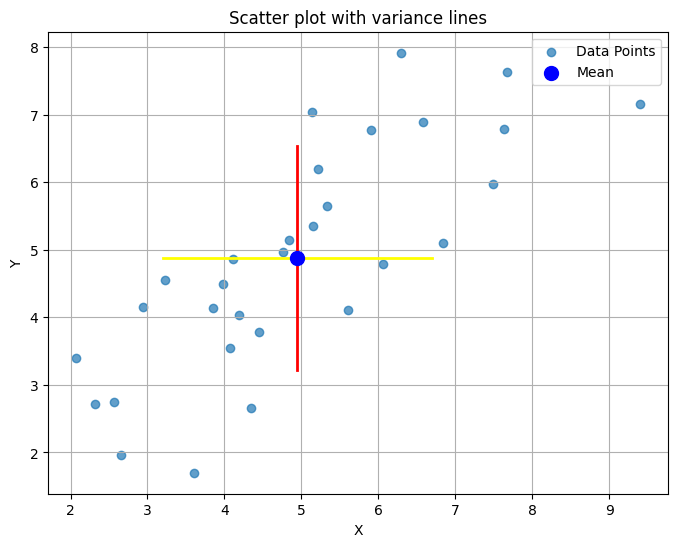

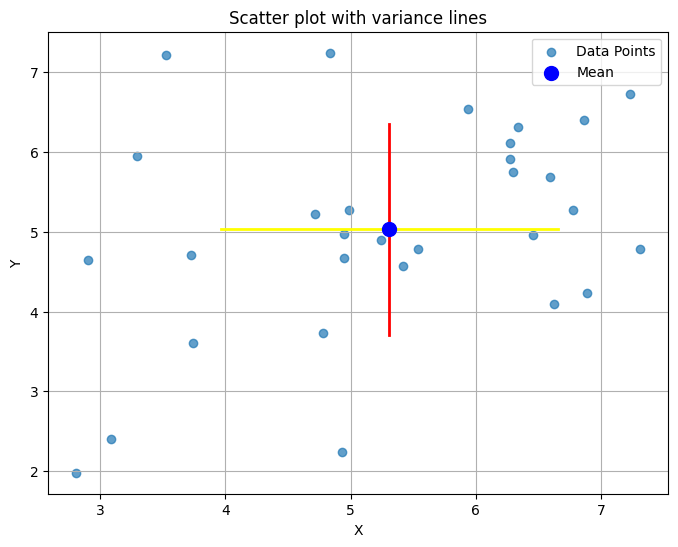

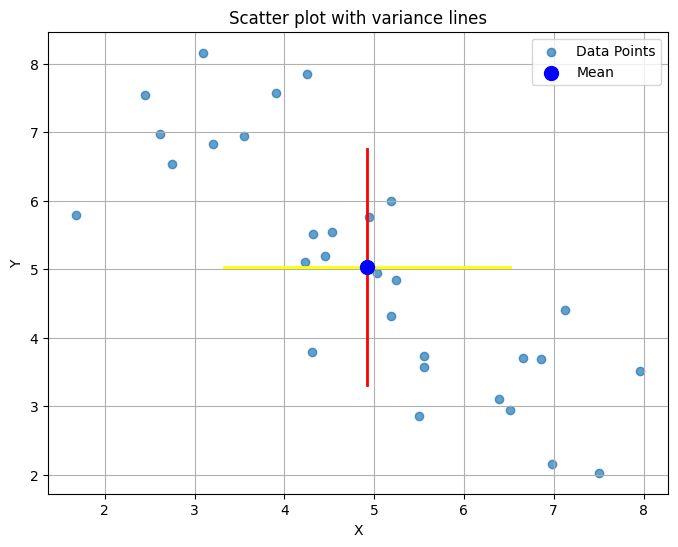

In [6]:
import numpy as np

# Define parameters
mean = [5, 5]
variance = 3
std_dev = np.sqrt(variance)
num_samples = 30

# Correlation coefficients
correlations = [0.8, 0.3, -0.8]

# Function generate the dataset
def gen_dataset(mean, std_dev, correlation, num_samples):
    cov = correlation * (std_dev ** 2)
    covariance_matrix = [[variance, cov], [cov, variance]]
    return np.random.multivariate_normal(mean, covariance_matrix, num_samples)

# Generate datasets
datasets = []
for corr in correlations:
    datasets.append(gen_dataset(mean, std_dev, corr, num_samples))

dataset_0_8 = datasets[0]
dataset_0_3 = datasets[1]
dataset_minus_0_8 = datasets[2]

# Plot the data
import matplotlib.pyplot as plt

def plot_dataset(dataset):
    x_vals = dataset[:, 0]
    y_vals = dataset[:, 1]

    mean_x = np.mean(x_vals)
    mean_y = np.mean(y_vals)
    var_x = np.var(x_vals)
    var_y = np.var(y_vals)
    std_dev_x = np.sqrt(var_x)
    std_dev_y = np.sqrt(var_y)

    # Plot the scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x_vals, y_vals, alpha=0.7, label='Data Points')

    # Plot the yellow horizontal line
    plt.plot([mean_x - std_dev_x, mean_x + std_dev_x], [mean_y, mean_y], color='yellow', linestyle='-', linewidth=2)

    # Plot the red vertical line
    plt.plot([mean_x, mean_x], [mean_y - std_dev_y, mean_y + std_dev_y], color='red', linestyle='-', linewidth=2)

    # Highlight the mean point
    plt.scatter(mean_x, mean_y, color='blue', s=100, zorder=5, label='Mean')

    # Add labels and legends
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter plot with variance lines')
    plt.legend()
    plt.grid(True)

    plt.show()

plot_dataset(dataset_0_8)
plot_dataset(dataset_0_3)
plot_dataset(dataset_minus_0_8)


As we can see in all three charts, the data looks completely different in all three cases, but the mean value and the variances are the same despite the different shapes of the data. The red line shows the variance in the y-direction and the yellow line shows the variance in the x-direction.

This means a better way to characterize the data is with the covariance:

$$Cov(X, Y) = \mathbb{E} \left[(x - \mu_{x})(y - \mu_{y})\right]$$

We can then write the covariance matrix for this two dimensional data

$$ Cov \vec{X} = \begin{pmatrix} Var(X) & Cov(X, Y) \\ Cov(Y, X) & Var(Y) \end{pmatrix}$$

- For a positive covariance, on average the y-value increases if we increase x.
- For a negative covariance, on average the y-value decreases if we increase x.
- If covariance is zero, then X and Y have nothing to do with each other.

Covariance matrix is always **symmetric positive definite** with variances always on the diagonal and covariances on the off diagonal.

It is simple to expand this to a d-dimensional dataset. Imagine that we have a d-dimensional dataset D where each $x$ is a vector of d-dimensions:

$$ D = \{x_{1}, \cdots, x_{N}\}, x_{i} \in \mathbb{R}^{d} $$

then we can calculate the covariance matrix of the data as:

$$Cov[D] = \frac{1}{N}\sum_{i=1}^{N}(\vec{x_{i}} - \vec{\mu})(\vec{x_{i}} - \vec{\mu})^T $$

which is a $d\times d$ matrix.

### Some basic operations with mean and variance
If we have a dataset $D = \{x_{1}, x_{2}, ... , x_{n}\}, x_{i} \in \mathbb{R}^d $ and then the transformation by matrix $A$ and shift by vector $\vec{b}$ results in transformations of the mean and covariance matrix as follows

$$\boxed{\mathbb{E}\left[AD + \vec{b}\right] = A\mathbb{E}\left[D\right] + \vec{b}} $$
and if we let $X$ represent the random vector as a transformation of the dataset $D$ such that $X = AD + \vec{b}$ then we can use the definition of covariance as follows:

$$Cov(X) = \mathbb{E}\left[(X - \mathbb{E}\left[X\right])(X - \mathbb{E}\left[X\right])^{T}\right]$$

Using the transformation and the formula for the mean of the transformation, we can write
$$\begin{align*} 
    Cov(X) 
    &= \mathbb{E}\left[(AD + \vec{b} - \mathbb{E}\left[AD + \vec{b}\right])(AD + \vec{b} - \mathbb{E}\left[AD + \vec{b}\right])^{T}\right] \\
    &= \mathbb{E}\left[(AD + \vec{b} - A\mathbb{E}\left[D\right] - \vec{b})(AD + \vec{b} - A\mathbb{E}\left[D\right] - \vec{b})^{T}\right] \\
    &= A\mathbb{E}\left[(D - \mathbb{E}\left[D\right])(D - \mathbb{E}\left[D\right])^{T}\right]A^{T}
\end{align*}$$
where we have cancelled the $\vec{b}$'s in the second step and taken the matrix $A$ outside of the expectation in the third step since it is a matrix of constants, not random variables. The term in the middle of the third line is now simply $Cov(D)$ so we rewrite this as
$$\boxed{ Cov(X) = ACov(D)A^{T} }$$


### Some basic numpy operations
**Arrays, matrices and shapes**: The following are some basic numpy operations that are useful when programming for linear algebra.

In [8]:
# Arrays and their shapes
array = np.array([1, 2, 3])
print(f"This is a basic array: {array}")
print(f"The shape of the array is like this: {array.shape}")
print("This means there are three items in the array.")

This is a basic array: [1 2 3]
The shape of the array is like this: (3,)
This means there are three items in the array.


In [10]:
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [10, 11, 12]])
print(f"This is a matrix: \n {matrix}")
print(f"The shape of the matrix is like this: {matrix.shape}")

This is a matrix: 
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
The shape of the matrix is like this: (4, 3)


As we can see, the shape of the matrix is defined in the same way as in mathematics, with row x column, i.e, $A \in \mathbb{R^{4 \times 3}}$. Let's make some matrices of ones and zeros using shapes information:

In [13]:
zero_array = np.zeros((5,)) # Will make [0 0 0 0 0]
zero_matrix = np.zeros((2, 3))
ones_matrix = np.ones((3, 2))
print(f"zero array: \n {zero_array}")
print(f"zero matrix: \n {zero_matrix}")
print(f"ones matrix: \n {ones_matrix}")

zero array: 
 [0. 0. 0. 0. 0.]
zero matrix: 
 [[0. 0. 0.]
 [0. 0. 0.]]
ones matrix: 
 [[1. 1.]
 [1. 1.]
 [1. 1.]]


**Reshaping arrays into column vectors, row vectors and matrices**

Another way to make an array is with arange. We can then reshape it into a matrix form

In [16]:
range_array = np.arange(4)
print(f"np.arrange(4) looks like this: {range_array}")
print(f"It has the following shape: {range_array.shape}")

np.arrange(4) looks like this: [0 1 2 3]
It has the following shape: (4,)


In [15]:
reshaped_range_array = range_array.reshape((-1, 1))
print(f"reshape((-1, 1)) has changed the array into a column vector:\n {reshaped_range_array}")
print(f"with the following shape: \n {reshaped_range_array.shape}")

reshape((-1, 1)) has changed the array into a column vector:
 [[0]
 [1]
 [2]
 [3]]
with the following shape: 
 (4, 1)


In [17]:
reshaped_range_array2 = range_array.reshape((1, -1))
print(f"reshape((-1, 1)) has changed the array into a row vector:\n {reshaped_range_array2}")
print(f"with the following shape: \n {reshaped_range_array2.shape}")

reshape((-1, 1)) has changed the array into a row vector:
 [[0 1 2 3]]
with the following shape: 
 (1, 4)


Let's examine some operations to access values within a matrix.

In [18]:
sq_matrix = np.arange(9).reshape(3, 3)
print(f"We have reshaped a range of 9 values into a 3x3 matrix: \n {sq_matrix}")

We have reshaped a range of 9 values into a 3x3 matrix: 
 [[0 1 2]
 [3 4 5]
 [6 7 8]]


In [23]:
print(f"Element at 0th row and 0th column: {sq_matrix[0, 0]}")
print(f"Element at 1st row and 1st column: {sq_matrix[1, 1]}")
print(f"Element at 2nd row and 1st column: {sq_matrix[2, 1]}")
print(f"Element at 0th row and 2nd column: {sq_matrix[0, 2]}")

Element at 0th row and 0th column: 0
Element at 1st row and 1st column: 4
Element at 2nd row and 1st column: 7
Element at 0th row and 2nd column: 2


In [28]:
sq_matrix2 = np.arange(16).reshape(4, 4)
print(f"The matrix looks like this:\n {sq_matrix2}")
print(f"The first column of the matrix: \n {sq_matrix2[:, 1]}")
print(f"The first column of the matrix reshaped to a column vector: \n {sq_matrix2[:, 1].reshape(-1, 1)}")
print(f"The third row of the matric reshaped to a row vector: \n {sq_matrix2[3, :].reshape(1, -1)}")

The matrix looks like this:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
The first column of the matrix: 
 [ 1  5  9 13]
The first column of the matrix reshaped to a column vector: 
 [[ 1]
 [ 5]
 [ 9]
 [13]]
The third row of the matric reshaped to a row vector: 
 [[12 13 14 15]]


**Numpy operations on arrays/matrices**

In [35]:
matrix1 = np.array([[6, 9, 8],
             [7, 3, 1]])
matrix2 = np.array([[1, 8, 4],
                   [3, 5, 2]])

print(f"Matrix addition is elementwise: \n {matrix1 + matrix2}")
print(f"Matrix multiplication is elementwise: \n {matrix1 * matrix2}")
print(f"Matrix division is elementwise: \n {matrix1 / matrix2}")
print(f"Matrix exponentiation is elementwise: \n {matrix1 ** matrix2}")

Matrix addition is elementwise: 
 [[ 7 17 12]
 [10  8  3]]
Matrix multiplication is elementwise: 
 [[ 6 72 32]
 [21 15  2]]
Matrix division is elementwise: 
 [[6.         1.125      2.        ]
 [2.33333333 0.6        0.5       ]]
Matrix exponentiation is elementwise: 
 [[       6 43046721     4096]
 [     343      243        1]]


We can also use numpy to perform linear algebra operations as follows.

**Transpose**

In [41]:
mat = np.arange(3).reshape((1,3))
mat2 = np.arange(3, 21, 3).reshape((2,3)) #arange(start, stop, step)
mat_transpose = mat.T
mat2_transpose = mat2.T
print(mat)
print(mat2)
print(f"The transpose of mat2 is: \n {mat2_transpose} and its shape is {mat2_transpose.shape}")
print(f"The transpose of mat is: \n {mat_transpose} and its shape is {mat_transpose.shape}")

[[0 1 2]]
[[ 3  6  9]
 [12 15 18]]
The transpose of mat2 is: 
 [[ 3 12]
 [ 6 15]
 [ 9 18]] and its shape is (3, 2)
The transpose of mat is: 
 [[0]
 [1]
 [2]] and its shape is (3, 1)


**Dot Product and Matrix Product**

In [43]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
print(f"Dot product of two arrays: {np.dot(x, y)}")
print(f"Alternative style: {x @ y}")

Dot product of two arrays: 32
Alternative style: 32


In [46]:
A = np.arange(2, 20, 2).reshape((3,3))
B = np.arange(3, 30, 3).reshape((3,3))
print(A)
print(B)
print(f"Matrix multiplication: \n {A@B}")

[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]
[[ 3  6  9]
 [12 15 18]
 [21 24 27]]
Matrix multiplication: 
 [[180 216 252]
 [396 486 576]
 [612 756 900]]


**Other linear algebra operations in numpy**

In [50]:
print(f"Determinant operation:  {np.linalg.det(A)}")
print(f"Inverse operation: \n  {np.linalg.inv(A)}")
eigenvalues, eigenvectors = np.linalg.eig(A)
print(f"Eigenvalues: \n  {eigenvalues}")
print(f"Eigenvectors: \n  {eigenvectors}")

Determinant operation:  -7.612957883143941e-15
Inverse operation: 
  [[ 1.57625987e+15 -3.15251974e+15  1.57625987e+15]
 [-3.15251974e+15  6.30503948e+15 -3.15251974e+15]
 [ 1.57625987e+15 -3.15251974e+15  1.57625987e+15]]
Eigenvalues: 
  [ 3.22336879e+01 -2.23368794e+00 -1.71654867e-15]
Eigenvectors: 
  [[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


**Useful data science manipulations**

In [65]:
data = np.array([[2, 1, 3],
                 [9, 4, 7]])
print(f"The min value in the data: {np.min(data)}")
print(f"The sum of each column returned as an array: \n {np.sum(data, axis=0)}")
print(f"The sum of each column returned as a matrix: \n {np.sum(data, axis=0, keepdims=True)}")
print(f"The sum of each row returned as a matrix: \n {np.sum(data, axis=1, keepdims=True)}")

The min value in the data: 1
The sum of each column returned as an array: 
 [11  5 10]
The sum of each column returned as a matrix: 
 [[11  5 10]]
The sum of each row returned as a matrix: 
 [[ 6]
 [20]]


In [66]:
def normalize(x):
    """
    Normalize all the columns of the matrix x
    Arguments:
    x: A numpy array with any number of dimensions
    Returns:
    c: The normalized numpy array
    """

    mean = np.mean(x, axis=0) # Finding the mean of each column
    print(mean)
    sigma = np.std(x, axis=0) # Finding the std of each column
    print(sigma)
    c = (x - mean) / sigma
    return c
print(f"The normalized version of the data matrix above is \n: {normalize(data)}")

[5.5 2.5 5. ]
[3.5 1.5 2. ]
The normalized version of the data matrix above is 
: [[-1. -1. -1.]
 [ 1.  1.  1.]]


*Something is wrong with the above - fix later : /*

## Mean and Covariance Using Numpy

In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('fivethirtyeight')
from sklearn.datasets import fetch_olivetti_faces
import time
import timeit
%matplotlib inline

Let's take a look at the olivetti faces dataset by considering
1. The size of the dataset
2. The dimensionality of the dataset

In [20]:
image_shape = (64, 64) # because each data point representing a face image is 4096 in length
dataset = fetch_olivetti_faces(data_home='./')
faces = dataset.data

print(f'Shape of the faces dataset: {faces.shape}')
print(f'{faces.shape[0]} data points')

Shape of the faces dataset: (400, 4096)
400 data points
[[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
 [0.45454547 0.47107437 0.5123967  ... 0.15289256 0.15289256 0.15289256]
 [0.3181818  0.40082645 0.49173555 ... 0.14049587 0.14876033 0.15289256]
 ...
 [0.5        0.53305787 0.607438   ... 0.17768595 0.14876033 0.19008264]
 [0.21487603 0.21900827 0.21900827 ... 0.57438016 0.59090906 0.60330576]
 [0.5165289  0.46280992 0.28099173 ... 0.35950413 0.3553719  0.38429752]]


In [12]:
from ipywidgets import interact

In [18]:
def show_face(face):
    plt.figure()
    plt.imshow(face.reshape((64, 64)), cmap='gray')
    plt.show()

interactive(children=(IntSlider(value=0, description='n', max=399), Output()), _dom_classes=('widget-interact'…

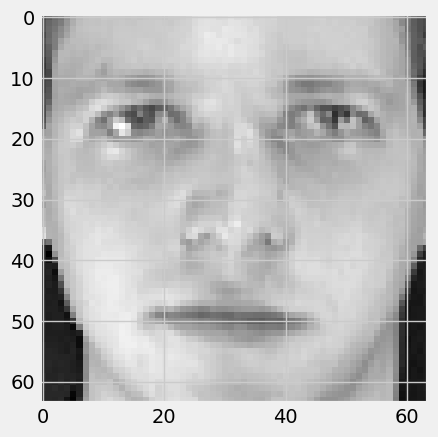

In [16]:
@interact(n=(0, len(faces) - 1))
def display_faces(n=0):
    plt.figure()
    plt.imshow(faces[n].reshape((64,64)), cmap='gray')
    plt.show()
display_faces()

**Mean**: We can calculate the mean of each column (each face), which gives an *average face*.
There are two ways to do it - a naive way looping over each column, or simply allowing vectorization to do it for us.

In [44]:
def mean_naive(X):
    """Computes the sample mean for a dataset by iterating over the dataset.
    
    Arguments:
        X: `ndarray` is matrix of shape (N, D) where N is
        the number of data points and D is the dimensionality of each point.
    Returns:
        mean: `ndarray` of shape (D, ), the sample mean of each row
    """
    # Create matrix of zeros first
    mean = np.zeros(X.shape[1]) # Same length as number of columns of matrix - here 4096
    for n in range(X.shape[1]): # Loop over each column
        mean[n] = np.mean(X[:, n]) # Take the mean of each column and place it in the mean array
    return mean

# This computes the mean using vectorization
def mean(X):
    mean = np.sum(X, axis=0) / X.shape[0]
    # m = np.mean(X, axis=0)
    return mean

m = mean_naive(faces)
print(m)
print(m.shape)
m1 = mean(faces)
print(m1)

[0.40013433 0.43423554 0.47628099 ... 0.32141531 0.3136467  0.31045455]
(4096,)
[0.40013435 0.43423545 0.4762809  ... 0.32141536 0.3136469  0.31045464]


We see that vectorization above makes life much simpler for us.
Let's try the same vectorization strategy for the covariance matrix, remembering that the covariance matrix is given by: $Cov[D] = \frac{1}{N}\sum_{i=1}^{N}(\vec{x_{i}} - \vec{\mu})(\vec{x_{i}} - \vec{\mu})^T $

In [41]:
def cov(X):
    N, D = X.shape
    x_mean = mean(X)
    X_centered = X - x_mean
    print(X_centered.T)
    print(X_centered)
    x_cov = (1/N) * ((X - x_mean).T @ (X - x_mean))
    return x_cov

# Quick tests
# X = np.array([[0., 1.], 
#               [1., 2.],
#               [0., 1.], 
#               [1., 2.]])
# c = cov(X)
# print(c)

Now we can see what the average face looks like

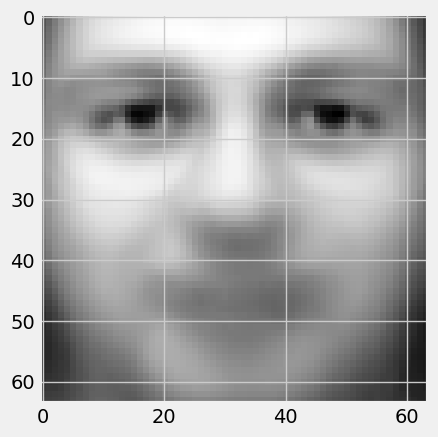

In [42]:
def mean_face(faces):
    return faces.mean(axis=0).reshape((64, 64))
plt.imshow(mean_face(faces), cmap='gray')

In [45]:
# Checking time for using naive mean and vectorized mean
X = np.random.randn(1000, 20)
%time mean_naive(X)
%time mean(X)
# Well, well, well! Naive version seems faster here!!!

CPU times: user 219 µs, sys: 61 µs, total: 280 µs
Wall time: 242 µs
CPU times: user 275 µs, sys: 266 µs, total: 541 µs
Wall time: 348 µs


array([ 0.00910092,  0.01472631, -0.01668906, -0.01014312,  0.01113703,
       -0.06008725,  0.02647761,  0.00955681,  0.06149283,  0.01358893,
        0.01492792, -0.01847673, -0.00460969, -0.01852756,  0.00333887,
        0.01395167, -0.00228116, -0.00260642,  0.00058705,  0.01044263])

### Affine transformations
We know the following from earlier: If $X = AD + \vec{b}$ where $A$ is a matrix
$$\boxed{ Cov(X) = ACov(D)A^{T} }$$
$$\boxed{\mathbb{E}\left[AD + \vec{b}\right] = A\mathbb{E}\left[D\right] + \vec{b}} $$


In [46]:
def affine_mean(mean, A, b):
    affine_mean = A@mean + b
    return affine_mean

def affine_cov(S, A):
    """
    Args:
        S: original covariance matrix of shape (D, D)
        A: matrix of shape (D, D)
    Return:
        affine transformation of covariance matrix with shape (D, D)
    """
    affine_S = A @ S @ A.T
    return affine_S

## Inner Products

$$x^{T}y = \sum_{i=1}^{N}x_{i}y_{i}, x, y \in \mathbb{R}^N$$
$$||x|| = \sqrt{x^{T}x}$$

Distance between two vectors
$$d(x, y) = ||x - y|| = \sqrt{(x - y)^{T}(x - y)}$$
and if $\alpha$ is the angle between the two vectors then
$$cos\alpha = \frac{x^{T}y}{||x|| ||y||}

Above, inner product was defined in terms of vectors.
More abstractly, an inner product is a symmetric positive definite bilinear mapping.

$$x, y \in V$$
$$\left<\cdot , \cdot\right>: V\times V \Rightarrow \mathbb{R}$$
- symmetric
- positive definite
- bilinear

**Bilinear**

This means linearity in *both* arguments of the function
$$x, y, z \in V, \lambda \in \mathbb{R}$$
$$\left<\lambda x + z, y\right> = \lambda\left<x, y\right> + \left<z, y\right>$$
$$\left<x, \lambda y + z\right> = \lambda\left<x, y\right> + \left<x, z\right>$$

**Positive Definite**

$$\left<x,x\right> \geq 0, \left<x,x\right> = 0 \Leftrightarrow x = 0$$

**Symmetry**
$$\left<x, y\right> = \left<y, x\right>$$

Based on this more general definition, we can see that there are different ways to write inner products. For example:
- The standard dot product $\left<x,y\right> = x^{T}y$
- $\left<x,y\right> = x^{T}Ay$

Both are valid because they are both symmetric positive definite bilinear operations as defined above, but with the second, we have to make sure the matrix A is such that the inner product satisfies the above conditions.

**Example**

If we are given a vector $\vec{x} = \begin{pmatrix} 1 \\ -1 \\ 3 \end{pmatrix}$ and an inner product defined as $\left<\vec{a},\vec{b}\right> = \vec{a}^{T}\begin{bmatrix} 2 & 1 & 0 \\ 1 & 2 & -1 \\ 0 & -1 & 2 \end{bmatrix}\vec{b}$, then we can use our definition of the norm above to calculate the length of the vector under this inner product.

We can find the angle between two vectors using the standard definition above, but for different dot products:

$$cos\alpha = \frac{x^{T}Ay}{||x||\cdot||y||}$$

The python code for these properties of inner products are below, accounting for a more general definition of the inner product.

Usually a basis is such that the angle between the vectors than span the vector space are at 90 degrees, i.e., they are orthogonal. However, in a space that has a different definition of the inner product, the vectors might not be orthogonal, requiring us to find another basis.

The orthonormal basis is just the orthogonal basis that has been normalized.

In [56]:
def inner_product(a,b, A):
    return a.T @ (A @ b)

def distance_between_vectors(a, b, A):
    vec = b-a
    in_prod = inner_product(vec, vec, A)
    return np.sqrt(in_prod)

def vector_length(a,A):
    in_prod = inner_product(a, a, A)
    return np.sqrt(in_prod)

def angle_between_vectors(a, b, A):
    angle = np.arccos((a.T @ (A @ b)) / (vector_length(a, A)*vector_length(b, A)))
    return angle

a = np.array([1,-1,3])
b = np.array([4, 2, 1])
A = np.array([[2,1,0],[1,2,-1],[0,-1,2]])
print(f"The length of {a} is {vector_length(a, A)}")
print(f"The distance between {a} and {b} is {distance_between_vectors(a, b, A)}")

B = np.array([[2, 0],[0, 1]])
x = np.array([1,1])
y = np.array([-1,1])
print(f"The angle between {x} and {y} is {angle_between_vectors(x, y, B)}")

x = np.array([1, 1, 1])
y = np.array([2,-1, 0])
A = np.array([[1,0, 0],[0,2,-1],[0,-1,3]])
print(f"The angle between {x} and {y} under {A} is {angle_between_vectors(x, y, A)}")


The length of [ 1 -1  3] is 5.0990195135927845
The distance between [ 1 -1  3] and [4 2 1] is 8.602325267042627
The angle between [1 1] and [-1  1] is 1.9106332362490186
The angle between [1 1 1] and [ 2 -1  0] under [[ 1  0  0]
 [ 0  2 -1]
 [ 0 -1  3]] is 1.3652273956337226


## Projections
Conditions of projections
1. $\exists\lambda\in\mathbb{R} : \Pi_{u}(\vec{x}) = \lambda\vec{b}$
2. $\left<\vec{b}, \Pi_{u}(\vec{x}) - \vec{x} \right> = 0$ (orthogonality)
A 2D representation of these conditions is as follows:

![alt text](images/Projections.png "2D vector representation of projections")

Given the second condition:
$$\left<\vec{b}, \Pi_{u}(\vec{x}) - \vec{x} \right> = 0$$
$$\Leftrightarrow \left< \vec{b},\Pi_{u(\vec{x})} \right> - \left<\vec{b}, \vec{x}\right> = 0$$
$$\Leftrightarrow \left< \vec{b},\lambda \vec{b} \right> - \left<\vec{b}, \vec{x}\right> = 0$$
$$\Leftrightarrow \lambda ||b||^{2} - \left< \vec{b}, \vec{x}\right> = 0$$
$$\Leftrightarrow \lambda = \frac{\left< \vec{b},\vec{x} \right>}{||\vec{b}||^{2}}$$
So, from the first condition:
$$\Rightarrow \Pi_{u}(\vec{x}) = \lambda \vec{b} = \frac{\left<\vec{b},\vec{x}\right>}{||\vec{b}||^{2}}\vec{b} = \frac{\vec{b}^{T}\vec{x}\vec{b}}{||\vec{b||^{2}}} = \frac{\vec{b}\vec{b}^{T}}{||\vec{b}||^{2}}\vec{x}$$

In other words, $\frac{\vec{b}\vec{b}^{T}}{||\vec{b}||^{2}}$ is a projection matrix (known as an outer product, or similarly it is the dyadic tensor product in which a 1D vector with a 1D vector will result in a 2D matrix) from the full space onto a one dimensional line. Our original vector $\vec{x}$ is still in its space, but we only need a single coordinate to represent it once it has been projected. We can write our functions in python for this like so:

In [66]:
def proj(x, b):
    # proj_u = (np.dot(b, x) / np.linalg.norm(b)**2) * b # This is the same as below
    proj_matrix = np.outer(b, b) / (np.linalg.norm(b)**2) # outer product
    proj_u = proj_matrix @ x
    return proj_u

b = np.array([2,1])
x = np.array([1,2])
print(f"The projection of {x} onto the vector that spans {b} is {proj(x, b)}")

The projection of [1 2] onto the vector that spans [2 1] is [1.6 0.8]


We can also say that the **reconstruction error** after projecting the vector onto its one dimensional subspace is the distance between the projection of the vector and the original vector itself.

## Projections in multiple dimensions

The following shows a projection in 3D space onto a 2D surface.

![alt text](images/Projection2D.png "Projection in 3D onto a 2D surface")

Looking at this example will allow us to generalize the projection calculations given above to multiple dimensions that is useful for handling datasets with a large number of dimensions.

